In [1]:
library('readr')
library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('stringr')
library('purrr')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘purrr’

The following object is masked from ‘package:magrittr’:

    set_names



In [2]:
load('../data/all_donors.RData')
ls()

[1] "all_binders"  "all_donors"   "all_features" "all_tcrs"

In [3]:
all_features %>% head

barcode,donor,Marker,PExpression
AAACCTGAGACAAAGG-4,donor1,CD3,2125
AAACCTGAGACTGTAA-34,donor1,CD3,1023
AAACCTGAGAGCCCAA-5,donor1,CD3,1598
AAACCTGAGAGCTGCA-24,donor1,CD3,298
AAACCTGAGAGGGATA-8,donor1,CD3,1036
AAACCTGAGAGTGAGA-23,donor1,CD3,1729


Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 63959 rows containing non-finite values (stat_bin).”

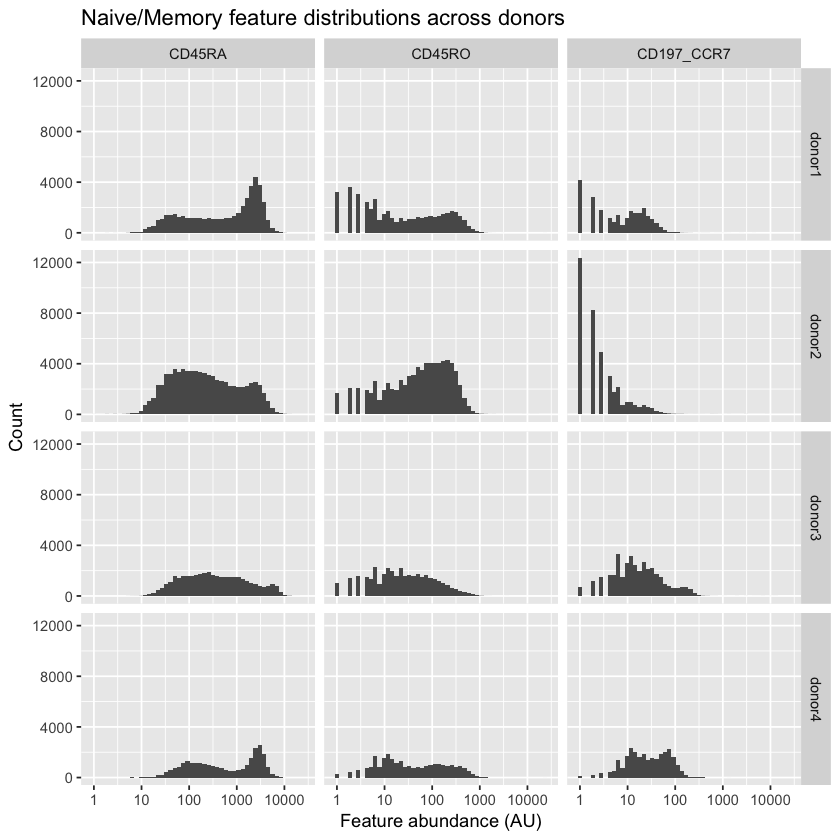

In [4]:
all_features %>%
    filter(`Marker` %in% c('CD45RO', 'CD45RA', 'CD197_CCR7')) %>%
    ggplot(aes(x=`PExpression`)) +
        geom_histogram(bins=50) +
        facet_grid(`donor`~`Marker`) +
        scale_x_log10() +
        labs(
            x='Feature abundance (AU)',
            y='Count',
            title='Naive/Memory feature distributions across donors'
        )

In [5]:
all_identities <- 
    all_donors %>%
    mutate(
        `Identity`=factor(
            case_when(
                `CD45RA` <  1000 & `CD197_CCR7` > 10 ~ 'CM',
                `CD45RA` <  1000 & `CD197_CCR7` <= 10 ~ 'EM',
                `CD45RA` >= 1000 & `CD197_CCR7` <= 10 ~ 'EMRA',
                TRUE ~ 'Naive'
            )
        )
    ) %>%
    select(
        `donor`,
        `cell_clono_cdr3_aa`,
        `Identity`,
        `CD45RA`, `CD45RO`, `CD197_CCR7`
    )

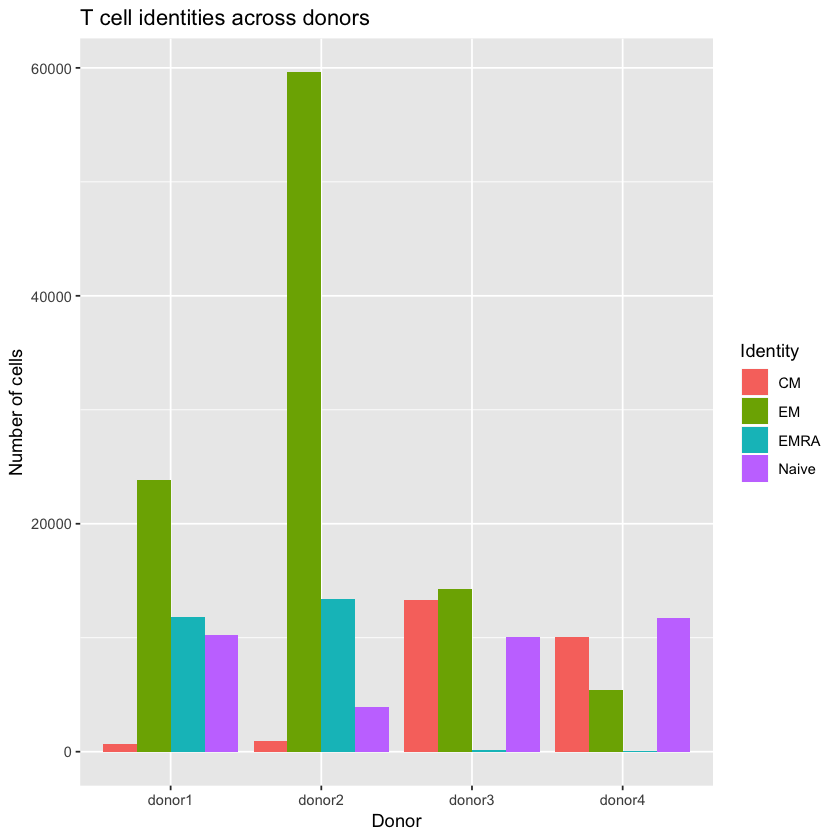

In [6]:
all_identities %>%
    group_by(`donor`, `Identity`) %>%
    summarize(`Count`=n()) %>%
    ungroup() %>%
    ggplot(aes(x=`donor`, y=`Count`, fill=`Identity`)) +
        geom_col(position='dodge') +
        labs(
            x='Donor',
            y='Number of cells',
            title='T cell identities across donors'
        )
        

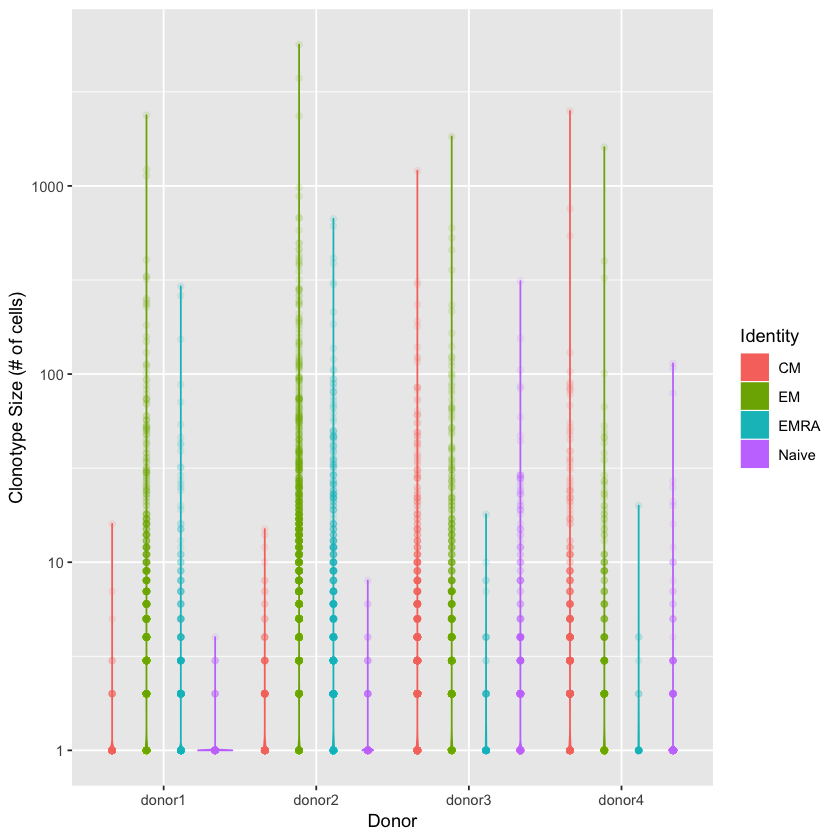

In [7]:
all_identities %>%
    group_by(`donor`, `Identity`, `cell_clono_cdr3_aa`) %>%
    summarize(`Count`=n()) %>%
    ungroup() %>%
    ggplot(aes(x=`donor`, y=`Count`, color=`Identity`, fill=`Identity`)) +
        geom_jitter(position=position_dodge(width=.9), alpha=.1) +
        geom_violin(position="dodge") +
        scale_y_log10() +
        labs(
            x='Donor',
            y='Clonotype Size (# of cells)'
        )


In [10]:
all_identities %>%
    filter(`Identity`=='Naive') %>%
    group_by(`donor`, `cell_clono_cdr3_aa`) %>%
    summarize(`Count`=n()) %>%
    ungroup() %>%
    arrange(`Count`) %>%
    tail(n=25)

donor,cell_clono_cdr3_aa,Count
donor3,TRA:CALSEADDDKIIF;TRB:CATSGAAYSGANVLTF,24
donor3,TRA:CATENSGGSNYKLTF;TRB:CASSARTGVGYGYTF,25
donor4,TRA:CAYRSARGSNYQLIW;TRB:CASSFWSGTQETQYF,25
donor3,TRA:CAFGFNNARLMF;TRB:CASGLVEGDSKNIQYF,26
donor3,TRA:CALSSGYSTLTF;TRB:CASTRNAFYSLGTGELFF,27
donor4,TRA:CAVNWEEQGGSYIPTF;TRB:CASRVSGSLSYNEQFF,27
donor3,TRA:CAFIGDAGGTSYGKLTF;TRB:CASSQDHRMGGHEKLFF,28
donor3,TRA:CAGADGTASKLTF;TRB:CASSLSGTWGEGYTF,28
donor3,TRA:CAIGPGNMLTF,28
donor3,TRA:CVVRSGGYNKLIF;TRB:CASSNSLPSGVSYNEQFF,28


In [11]:
all_identities %>%
    filter(
        `cell_clono_cdr3_aa` == 'TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF'
    )

donor,cell_clono_cdr3_aa,Identity,CD45RA,CD45RO,CD197_CCR7
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,EM,53,9,6
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,CM,680,31,14
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,EM,83,7,1
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,EM,191,28,7
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,CM,175,290,26
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,EM,88,141,7
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,CM,546,61,11
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,CM,409,50,12
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,Naive,1219,39,21
donor4,TRA:CAVDLMKTSYDKVIF;TRB:CASRTGLASTDTQYF,CM,945,20,18
